## Mesh refinement study using a spherical molecule and an off-center charge

To verify our BEM-FMM integration, we performed a mesh refinement study using a spherical molecule with an off-center charge.
We ran this experiment on a single CPU node of Pegasus, and the raw result files are located at `/repro-pack/runs/sphere_convergence`.
This notebook demonstrates how we generated all results presented in section 3.2 using the raw data.

In this case, the molecule has a radius of $4A$ and a relative permittivity of $\epsilon_1 = 4$; the unit charge is located at $(1,1,1)$.
The solvent region has a relative permittivity of water ($\epsilon_2 = 80$); and the salt concentration is set to $150mM$ $(\kappa = 1/8A^{-1})$.
Other parameters are listed in the table below.
We compute the solvation energy of this molecule using 5 meshes with a constant refinement factor of 4.
We set `restart=400` (in the interface of `scipy.sparse.linalg.gmres`) to make sure we use full GMRES instead of restarted GMRES.

#### Table: simulation parameters used in the mesh refinement study for a spherical molecule
| tolerance | # regular quadrature points | FMM expansion order | FMM ncrit |
|:---------:|:------------------------:|:-------------------:|:---------:|
|    1e-7   |             6            |          10         |    500    |

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from bempp_pbs.postprocess import PLOT_PARAMS, get_df

In [2]:
plt.rcParams.update(PLOT_PARAMS)   # update plot style

**load results**

We used both the direct and the derivative formulations in our study.
With the latter formulation, computing the mass-matrix preconditioner is computationally expensive due to the sparse LU decomposition, hence we also tried its variant mass-lumping preconditioner which is diagonal.
Therefore, we are loading three sets of results below:
- `direct`: direct formulation with a block-diagonal preconditioner
- `derivative`: derivative formulation with a mass-lumping preconditioner
- `derivative_mass_matrix`: derivative formulation with a mass-matrix preconditioner

In [3]:
direct_df = get_df('../runs/sphere_convergence/direct/', formulation='direct', skip4=True)
direct_df

,t_total_assembly,t_total_gmres,num_iter,e_solv [kcal/Mol],memory [GB],t_fmm_init,t_singular_assembler,t_assemble_sparse,t_assembly_other,t_singular_correction,t_laplace,t_helmholtz,t_avg_laplace,t_avg_helmholtz,t_gmres_other
num_elem,,,,,,,,,,,,,,,
512,7.490088,8.333747,19,-12.407749,1.061368,1.420244,1.632614,1.590659,2.846571,0.304548,0.557566,7.320503,0.006638,0.087149,0.151130
2048,6.445075,19.446817,29,-12.295549,1.134476,1.619401,1.460918,1.478298,1.886458,1.076706,1.763841,16.284985,0.013780,0.127226,0.321285
8192,9.066045,56.354606,49,-12.267656,1.350828,3.027767,1.790531,1.528490,2.719257,6.844387,6.262217,42.266316,0.029539,0.199369,0.981685
32768,14.675673,157.207376,65,-12.260696,1.911036,3.365013,2.791111,1.559950,6.959598,26.899999,24.795346,101.972517,0.089838,0.369466,3.539514
131072,35.111602,502.632899,78,-12.258956,4.388964,6.085056,6.155186,1.862700,21.008659,67.496343,115.020361,306.271592,0.350672,0.933755,13.844603


In [4]:
derivative_df = get_df('../runs/sphere_convergence/derivative_ex/', formulation='derivative', skip4=True)
derivative_df

,t_total_assembly,t_total_gmres,num_iter,e_solv [kcal/Mol],memory [GB],t_fmm_init,t_singular_assembler,t_assemble_sparse,t_assembly_other,t_singular_correction,t_laplace,t_helmholtz,t_avg_laplace,t_avg_helmholtz,t_gmres_other
num_elem,,,,,,,,,,,,,,,
512,7.896239,17.657763,13,-12.406390,1.057392,1.436824,0.851983,2.717672,2.889760,0.534953,0.748106,16.100506,0.006234,0.097579,0.274198
2048,10.780603,23.068034,11,-12.295424,1.148660,2.748528,1.677871,2.805058,3.549146,1.219254,1.474766,20.013238,0.014180,0.139953,0.360776
8192,11.743538,36.236965,10,-12.267646,1.426564,2.191105,1.155905,2.702050,5.694479,3.685117,3.237242,28.500866,0.033721,0.215916,0.813740
32768,25.019946,72.204444,10,-12.260695,2.128520,3.477290,3.690466,2.941200,14.910990,10.299995,8.965194,50.845174,0.093387,0.385191,2.094081
131072,70.874233,178.740306,9,-12.258957,4.931340,6.797049,8.565052,3.825800,51.686333,24.303038,31.662821,114.923597,0.359805,0.949782,7.850849


In [5]:
derivative_mass_matrix_df = get_df('../runs/sphere_convergence/derivative_ex_mass_matrix/', formulation='derivative', skip4=True)
derivative_mass_matrix_df

,t_total_assembly,t_total_gmres,num_iter,e_solv [kcal/Mol],memory [GB],t_fmm_init,t_singular_assembler,t_assemble_sparse,t_assembly_other,t_singular_correction,t_laplace,t_helmholtz,t_avg_laplace,t_avg_helmholtz,t_gmres_other
num_elem,,,,,,,,,,,,,,,
512,7.951847,9.486323,7,-12.406390,1.069280,1.336875,1.093968,2.620048,2.900956,0.308624,0.469827,8.534886,0.006525,0.086211,0.172985
2048,8.191285,14.839738,7,-12.295424,1.171052,1.640708,0.539602,2.641400,3.369575,0.796061,1.026304,12.710390,0.014254,0.128388,0.306983
8192,12.230075,25.545058,7,-12.267646,1.433172,2.012092,0.819760,2.871210,6.527013,2.550073,2.523996,19.881315,0.035056,0.200821,0.589673
32768,24.609591,53.578572,7,-12.260695,2.223700,3.302885,3.819953,2.905700,14.581053,7.999652,6.816329,37.232491,0.094671,0.376086,1.530101
131072,72.008442,146.240014,7,-12.258957,5.127200,6.647991,8.683246,3.801200,52.876006,18.460121,25.823684,93.579440,0.358662,0.945247,8.376769


The numbers of iteration show that the mass-lumping preconditioner is an effective substitution for the mass-matrix preconditioner for our study, only adding a few more iterations.
Therefore, we only reported the results from using the latter in our manuscript.

**Compare with the analytical solution**

Using Kirkwood's derivation, we computed the analytical solution of the solvation energy for this spherical molecule: $-12.2583630$ [kCal/mol], with which we computed the relative error of our results. 

In [6]:
e_solv_exact = -12.2583630
e_solv = direct_df['e_solv [kcal/Mol]'].values
rel_error_direct = np.abs((e_solv-e_solv_exact)/e_solv_exact)
e_solv = derivative_df['e_solv [kcal/Mol]'].values
rel_error_derivative = np.abs((e_solv-e_solv_exact)/e_solv_exact)

# below are the results from PyGBe running the same case
e_solv_collocation = np.array((-12.4326706, -12.301547, -12.269150778, -12.261115, -12.25916835))
rel_error_collocation = np.abs((e_solv_collocation-e_solv_exact)/e_solv_exact)

**Relative error of the solvation energy using the direct formulation**

In [7]:
pd.DataFrame({'number of elements': direct_df.index, 'relative error (%)': rel_error_direct*100}).set_index('number of elements')

,relative error (%)
number of elements,
512,1.218649
2048,0.303356
8192,0.075813
32768,0.019033
131072,0.004837


**Relative error of the solvation energy using the derivative formulation**

In [8]:
pd.DataFrame({'number of elements': derivative_df.index, 'relative error (%)': rel_error_derivative*100}).set_index('number of elements')

,relative error (%)
number of elements,
512,1.207559
2048,0.302336
8192,0.075730
32768,0.019026
131072,0.004842


The figure below shows the error of the solvation energy converges at the expected rate of $1/N$ for both formulations.

**Figure: Mesh convergence study of the solvation energy of a spherical molecule with an off-center charge, using both direct and derivative formulation. The error is with respect to the analytical solution $-12.2583630$ [kCal/mol]. The sphere is discretized with 512, 2048, 8192, 32768 and 131072 boundary elements.**

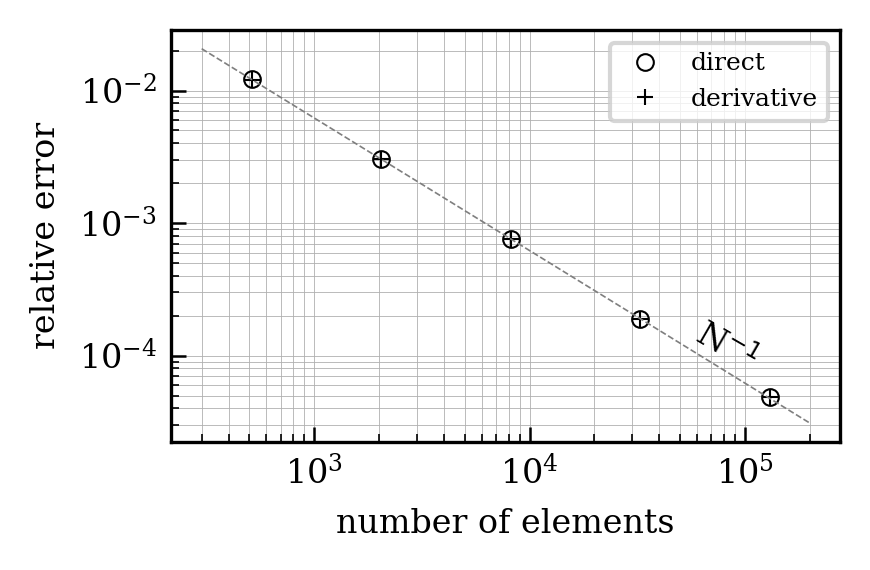

In [9]:
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(111)
N = direct_df.index.values
N_ = np.array((3e2, 2e5))
asymp = N[2] * rel_error_direct[2] / N_
ax.loglog(N, rel_error_direct, linestyle='', marker='o', fillstyle='none', label='direct', color='black')
ax.loglog(N, rel_error_derivative, linestyle='', marker='+', fillstyle='none', label='derivative', color='black')

# ax.loglog(N, rel_error_collocation, linestyle='', marker='x', label='collocation', ms=4)

ax.loglog(N_, asymp, linestyle='--', color='#7f7f7f')
ax.grid(which="both")
ax.set_xlabel('number of elements')
ax.set_ylabel('relative error')
ax.legend()

loc = (3*N[-2]+N[-1])/4
text_loc = np.array((loc, 1.2*N[-2]*rel_error_direct[-2]/loc))
ax.text(text_loc[0], text_loc[1],r'N$^{-1}$', fontsize=8, rotation=-30,rotation_mode='anchor')
plt.tight_layout()
# plt.savefig('../../tex/figs/sphere_convergence.pdf', dpi=300);